In [230]:
import numpy as np
import scipy
from scipy import special
import matplotlib.pyplot as plt

In [231]:
# functions
# 1. takes number of segments and player positions and returns relative payoffs (for any number of players)
# 2. takes one positions and determines the next optimal positions for one player (uses function 1) 

In [232]:
def payoffs(npl, positions):
    res = np.zeros(len(positions))
    for i in range(len(positions)): # loops though each player
        p = positions[i] # player position
        po = np.delete(positions, i)
        do = np.zeros(len(po)) # distances of opponents
        for j in range(len(po)): # loops through opponents difference
            do[j] = po[j]-p    
        inc = len(do)-np.count_nonzero(do)    
        db = do[np.where(do < 0, do, -np.inf).argmax()] # largest negative (distance below)        
        da = do[np.where(do > 0, do, np.inf).argmin()] # smallest positive (distance above)
        if db == 0 and da == 0:
            res=npl/len(res)*np.ones(len(res))
            break
        if db >= 0: # case where youre to left
            res[i] += (p+da/2)/(inc+1)
        elif da <= 0: # case where you're to right
            res[i] += ((npl-p)+abs(db)/2)/(inc+1)            
        else:
            res[i] += (abs(db)+da)/2/(inc+1)
    return res

In [235]:
print(payoffs(10,[10,10,1]))

[2.25 2.25 5.5 ]


In [281]:
def payoffmax(p, npl, positions):
    payoffv = np.zeros(npl+1)
    for i in range(len(payoffv)):
        pos = positions
        pos[p] = i
        ps = payoffs(npl, pos)
        payoffv[i]=ps[p]
    return np.argmax(payoffv)

In [283]:
print(payoffmax(1, 10, [10,10,1]))

2


In [404]:
positions=[10,10,10,10,10,10]
npl = 100

In [405]:
p = np.zeros((6,500))
for i in range(len(p[0,:])):
    ri = np.random.randint(6)
    positions[ri]=payoffmax(ri, npl, positions)
    p[:,i] = positions

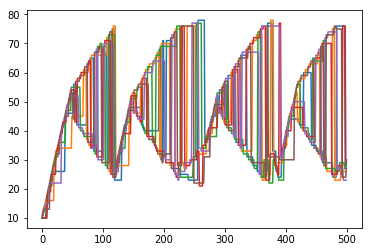

In [406]:
plt.plot(p[0,:])
plt.plot(p[1,:])
plt.plot(p[2,:])
plt.plot(p[3,:])
plt.plot(p[4,:])
plt.plot(p[5,:])